<div style="border:solid green 2px; padding: 20px">
    
<b> Hello, James!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are no assignments in the project: 

* 1.14 Revenue
* 1.15 Test statistical hypotheses
* 1.16 General conclusion

Unfinished project was sent by accident? Then please fix it,

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

In [1]:
# poupose of this project is to use all of the tools we have learn for mainly dealing with statistics to compare two different models and see how, why, and which version is more cost efficient. 
# profitability between surf and ultimate to discover will help determine the strategy
# main steps are data aggregating, data merging, revenue calculation, descriptive analysis, visual comparison, and hypothesis testing
# Loading all the libraries
# below are the the libraries we have encountered so far in the lessons and also the ones we will be using to get to our answer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
#

## Load data

In [2]:
# Load the data files into different DataFrames
# Load each CSV file into a separate DataFrame from the provided data from project
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
print("\nPlans Data:") #checking to see if csv file loaded correctly
print(plans.head())


Plans Data:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [4]:
# Print a sample of data for plans
display(plans) # remember to use display rather than print

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


It is better to use display() rather than print() to output a dataframe object. This way it will be clearer

 surf plan include 50 messages, 15 gigs of data, and 500 minutes of call $20
 ultimate plan include 1000 messages, 30 gigs of data, and 3000 minutes of call. $70

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
# convering 'mb_per_month_included' to gigabyte
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
# renaming cost columns for additional usage
plans.rename(columns={'usd_per_gb': 'usd_per_gb_additional',
                      'usd_per_message': 'usd_per_message_additional',
                      'usd_per_minute': 'usd_per_minute_additional'}, inplace=True)


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, there are 1,024 megabytes in one gigabyte.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [6]:
# questions on what enrich data mean?
display(plans.head()) # v2 update

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb_additional,usd_per_message_additional,usd_per_minute_additional,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Users

In [7]:
# Print the general/summary information about the users' DataFrame
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Print a sample of data for users
print(users.sample(5))


     user_id first_name  last_name  age  \
315     1315       Mora  Schroeder   45   
93      1093     Karima    Hampton   69   
10      1010     Wilber      Blair   52   
397     1397     Willow     Steele   70   
386     1386       Jeni    Gilbert   30   

                                                 city    reg_date  plan  \
315                              Raleigh-Cary, NC MSA  2018-04-26  surf   
93   Nashville-Davidson–Murfreesboro–Franklin, TN MSA  2018-12-17  surf   
10                Dallas-Fort Worth-Arlington, TX MSA  2018-03-09  surf   
397                             Oklahoma City, OK MSA  2018-06-01  surf   
386                   Seattle-Tacoma-Bellevue, WA MSA  2018-04-11  surf   

     churn_date  
315  2018-10-03  
93          NaN  
10          NaN  
397         NaN  
386         NaN  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
# there are multiple nan returns for churn_date, "missing data"
users['reg_date'] = pd.to_datetime(users['reg_date']) #converting to objects
# since this is a time series, should considered column 'reg_date' and 'churn_ date' for proper results
users['churn_date'] = users['churn_date'].fillna('Not Churned')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
users['is_churned'] = users['churn_date'].notna() # boolean column 'is_churned'


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
# questions on what enrich data mean?
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False


## Calls

In [11]:
# Print the general/summary information about the calls' DataFrame
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Print a sample of data for calls
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


In the single or last line of a Jupiter code cell, the print() method is optional, unlike in the simulator

conclusion it has 4 columns with no missing values. call_date columns needs to be converted to a datetime method. this will help with time base analysis

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [13]:
# this to fix, call_date column is object, needs to convert to datetime series.
calls['call_date'] = pd.to_datetime(calls['call_date'])
# ceiling function for the round up call since this will be billed monthly
calls['duration'] = np.ceil(calls['duration'])

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for using the np.ceil() method

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
# extracting data for year, month, and day
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['day'] = calls['call_date'].dt.day
# categorize calls based on duration
calls['call_category'] = pd.cut(calls['duration'], bins=[0, 5, 10, np.inf], labels=['short', 'medium', 'long'])
display(calls.head())

,id,user_id,call_date,duration,year,month,day,call_category
0,1000_93,1000,2018-12-27,9.0,2018,12,27,medium
1,1000_145,1000,2018-12-27,14.0,2018,12,27,long
2,1000_247,1000,2018-12-27,15.0,2018,12,27,long
3,1000_309,1000,2018-12-28,6.0,2018,12,28,medium
4,1000_380,1000,2018-12-30,5.0,2018,12,30,short


## Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
# Print a sample of data for messages
print(messages.sample(5))

             id  user_id message_date
22214  1133_120     1133   2018-12-09
39619  1257_172     1257   2018-09-07
47795  1324_515     1324   2018-10-02
17130  1113_232     1113   2018-12-22
68083  1439_477     1439   2018-10-30


conclusion there are no null values in the columns so there isn't any missing values, id column is an object type, which is unique
message_date should idealy be a datetime format to allow for easy manipulation by using pd.to.datetime()
by doing so this will help with the time based analysis. This is very crucial for analysis

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
# converting message_date to datetime data type 
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [18]:
# extracting data to year, month and day 
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
messages['day'] = messages['message_date'].dt.day
# message count by day per user
messages['message_count'] = messages.groupby('user_id')['id'].transform('count')
display(messages.head())


,id,user_id,message_date,year,month,day,message_count
0,1000_125,1000,2018-12-27,2018,12,27,11
1,1000_160,1000,2018-12-31,2018,12,31,11
2,1000_223,1000,2018-12-31,2018,12,31,11
3,1000_251,1000,2018-12-27,2018,12,27,11
4,1000_255,1000,2018-12-26,2018,12,26,11


## Internet

In [19]:
# Print the general/summary information about the internet DataFrame
display(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [20]:
# Print a sample of data for the internet traffic
(internet.sample(5))

,id,user_id,session_date,mb_used
10885,1054_424,1054,2018-12-19,303.55
88299,1408_18,1408,2018-04-18,0.00
16455,1073_394,1073,2018-08-27,430.77
73599,1346_180,1346,2018-10-22,166.18
80146,1374_222,1374,2018-08-03,545.41


here it was good to look through the data to create numeric columns such as total mins, numbers of message, and total mb use to be able to clean the data, examing missing data, and make sure the information are consistent using datatime format will help in the long run since we are correcting the data types

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

It is worth describing intermediate conclusions in the markdown cell.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__

Please take a look at the example.  How to format the text in the markdown cell correctly. Correction. Please, on the entire project
    
    
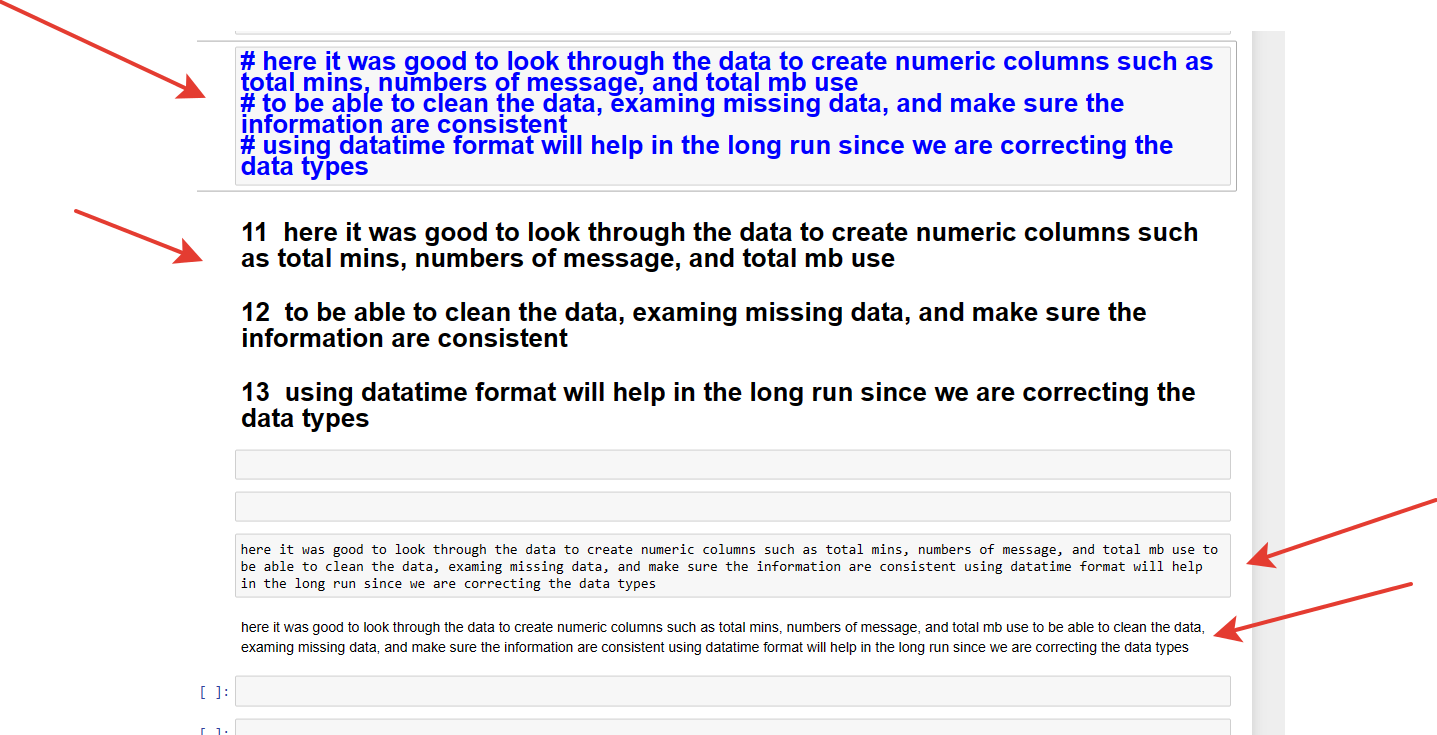

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [21]:
# converting sesssion_date to a datetime for series analysis
internet['session_date'] = pd.to_datetime(internet['session_date'])


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [22]:
# categorizing data for usage
# Extracting year, month, and day
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['day'] = internet['session_date'].dt.day
display(internet.head())

,id,user_id,session_date,mb_used,year,month,day
0,1000_13,1000,2018-12-29,89.86,2018,12,29
1,1000_204,1000,2018-12-31,0.00,2018,12,31
2,1000_379,1000,2018-12-28,660.40,2018,12,28
3,1000_413,1000,2018-12-26,270.99,2018,12,26
4,1000_442,1000,2018-12-27,880.22,2018,12,27


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb_additional,usd_per_message_additional,usd_per_minute_additional,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
# extract data from data cvs on 'call_date'column, then group data by user_id and month, then calculate sum and count
# rename columns
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
calls_per_month = calls.groupby(['user_id', 'year', 'month']).agg({'id': 'count'}).reset_index()
calls_per_month.columns = ['user_id', 'year', 'month', 'number_of_calls']

In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# create a month column from call_date, group data by user_id and month, rename columns for clarity 
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year
minutes_per_month = calls.groupby(['user_id', 'year', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month.columns = ['user_id', 'year', 'month', 'total_minutes']

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
# extract month and year from message_date, then group data by user_id and monthy and calculate
# rename columns
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year
messages_agg = messages.groupby(['user_id', 'year', 'month']).agg({'id': 'count'}).reset_index()
messages_agg.columns = ['user_id', 'year', 'month', 'num_messages']
display(messages_agg)

,user_id,year,month,num_messages
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
...,...,...,...,...
1801,1496,2018,9,21
1802,1496,2018,10,18
1803,1496,2018,11,13
1804,1496,2018,12,11


In [27]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year
internet_agg = internet.groupby(['user_id', 'year', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_agg.columns = ['user_id', 'year', 'month', 'total_mb_used']

Calculate the volume of internet traffic used by each user per month. Save the result.
extract month and year from session_date, group data by user_id and month, then calculate the sum 
rename columns
Merge the data for calls, minutes, messages, internet based on user_id and month
first merge calls and minutes data,
next merge messages 
merge internet 
finally merge plan

In [28]:
calls_minutes_per_month = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'year', 'month'], how='outer')
aggregate_data = pd.merge(calls_minutes_per_month, messages_agg, on=['user_id', 'year', 'month'], how='outer')
aggregate_data = pd.merge(aggregate_data, internet_agg, on=['user_id', 'year', 'month'], how='outer')
aggregate_data = pd.merge(aggregate_data, users[['user_id', 'plan']], on='user_id', how='left')

In [29]:
# Add the plan information
# fill nan values for users who didn't make any calls, send messages, or use data with zero
columns_to_fill = ['number_of_calls', 'total_minutes', 'num_messages', 'total_mb_used']
aggregate_data[columns_to_fill] = aggregate_data[columns_to_fill].fillna(0)
aggregate_data.head()

,user_id,year,month,number_of_calls,total_minutes,num_messages,total_mb_used,plan
0,1000,2018,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,2018,8,27.0,182.0,30.0,6919.15,surf
2,1001,2018,9,49.0,315.0,44.0,13314.82,surf
3,1001,2018,10,65.0,393.0,53.0,22330.49,surf
4,1001,2018,11,64.0,426.0,36.0,18504.30,surf


## Study user behaviour

In [30]:
# Calculate the monthly revenue for each user
def calculate_monthly_revenue(user_row, plans_df):
    # Extract user plan and plan details
    user_plan = user_row['plan']
    plan_details = plans_df[plans_df['plan_name'] == user_plan].iloc[0]
    # Start with the monthly plan payment
    monthly_revenue = plan_details['usd_monthly_pay']
    # Add charge for extra minutes if applicable
    extra_minutes = max(user_row['total_minutes'] - plan_details['minutes_included'], 0)
    monthly_revenue += extra_minutes * plan_details['usd_per_minute_additional']
    # Add charge for extra messages if applicable
    extra_messages = max(user_row['num_messages'] - plan_details['messages_included'], 0)
    monthly_revenue += extra_messages * plan_details['usd_per_message_additional']
    # Calculate extra data charges if applicable, convert MB to GB and round up
    gb_included = plan_details['mb_per_month_included'] / 1024
    extra_data_gb = math.ceil(max(user_row['total_mb_used'] / 1024 - gb_included, 0))
    monthly_revenue += extra_data_gb * plan_details['usd_per_gb_additional']
    return monthly_revenue

# aggregate data
aggregate_data['monthly_revenue'] = aggregate_data.apply(calculate_monthly_revenue, axis=1, plans_df=plans)

# display monthly revenue column
display(aggregate_data[['user_id', 'plan', 'monthly_revenue']].head())

,user_id,plan,monthly_revenue
0,1000,ultimate,70.00
1,1001,surf,20.00
2,1001,surf,20.00
3,1001,surf,90.09
4,1001,surf,60.00


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great feature

## Study user behaviour

conclusion in this process we aggregated number of calls, total minutes, num of messagtes, and total mb used.
individual aggregates have been merged into a single aggregate_data, user plans added for revenue purposes, missing values are substitutated with
applying the calculation logic for revenue helps to decipyer which plan is better do to the allowances that are allowed for a free plan compare to something that will have

### Calls

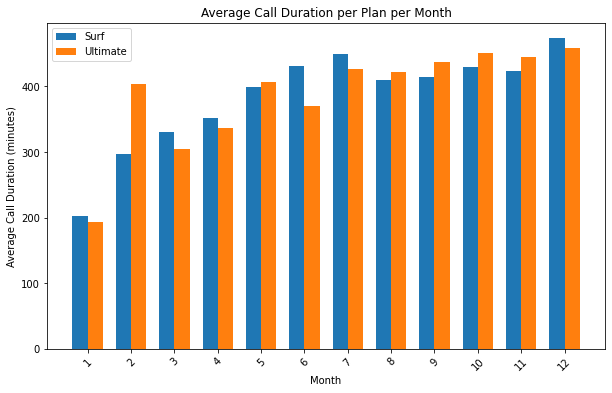

In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# group data by month, plan, then calcuate the mean of total minutes
average_call_duration = aggregate_data.groupby(['month', 'plan'])['total_minutes'].mean().reset_index()
# pivoting data for months on axis and plans on other, then get average duration
pivot_table = average_call_duration.pivot(index='month', columns='plan', values='total_minutes')
# barplot
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(pivot_table))
width = 0.35
surf_bars = ax.bar(ind - width/2, pivot_table['surf'], width, label='Surf')
ultimate_bars = ax.bar(ind + width/2, pivot_table['ultimate'], width, label='Ultimate')
ax.set_xlabel('Month')
ax.set_ylabel('Average Call Duration (minutes)')
ax.set_title('Average Call Duration per Plan per Month')
ax.set_xticks(ind)
ax.set_xticklabels(pivot_table.index, rotation=45)
ax.legend()
# Show the plot
plt.show()

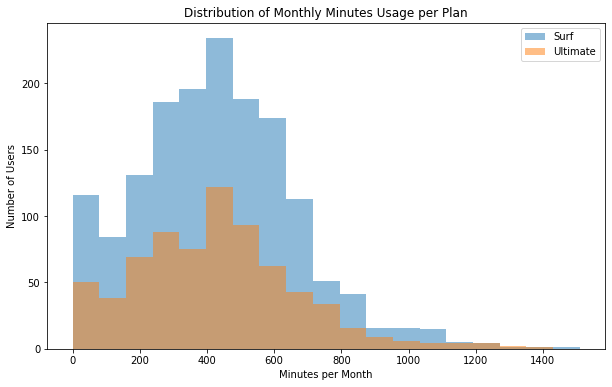

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# filter data for surf and ultimate plan
surf_minutes = aggregate_data[aggregate_data['plan'] == 'surf']['total_minutes']
ultimate_minutes = aggregate_data[aggregate_data['plan'] == 'ultimate']['total_minutes']
# define bins and range to cover minutes
bins = np.linspace(0, max(aggregate_data['total_minutes']), 20)
# histogram for both plans
plt.figure(figsize=(10, 6))
plt.hist(surf_minutes, bins, alpha=0.5, label='Surf')
plt.hist(ultimate_minutes, bins, alpha=0.5, label='Ultimate')
# lable and titles
plt.xlabel('Minutes per Month')
plt.ylabel('Number of Users')
plt.title('Distribution of Monthly Minutes Usage per Plan')
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization. Well done

conclusion this side by side bar plot compares average calls duration of user from surf and ultimate plan
we can see if one has longer avg calls duration, it seems that the ultimate has longer calls due to unlimited
surf plan are usually more influence with the overage charges to see changes within the bar. 
conclusion this histogram will help show frequency distribution for the mins. 
difference are notable in the surf due to the limits of data and capped before overages are applied
with the usage data we can use the marketing to adapt to push for a improvement to optimize user satisfaction

In [33]:
# Calculate the mean and the variance of the monthly call duration
# mean and variance for surf plan
surf_minutes = aggregate_data[aggregate_data['plan'] == 'surf']['total_minutes']
surf_mean = surf_minutes.mean()
surf_variance = surf_minutes.var()
# calculate the mean and variance for ultimate plan
ultimate_minutes = aggregate_data[aggregate_data['plan'] == 'ultimate']['total_minutes']
ultimate_mean = ultimate_minutes.mean()
ultimate_variance = ultimate_minutes.var()
print(f"Surf Plan - Mean: {surf_mean:.2f}, Variance: {surf_variance:.2f}")
print(f"Ultimate Plan - Mean: {ultimate_mean:.2f}, Variance: {ultimate_variance:.2f}")

Surf Plan - Mean: 428.75, Variance: 54968.28
Ultimate Plan - Mean: 430.45, Variance: 57844.46


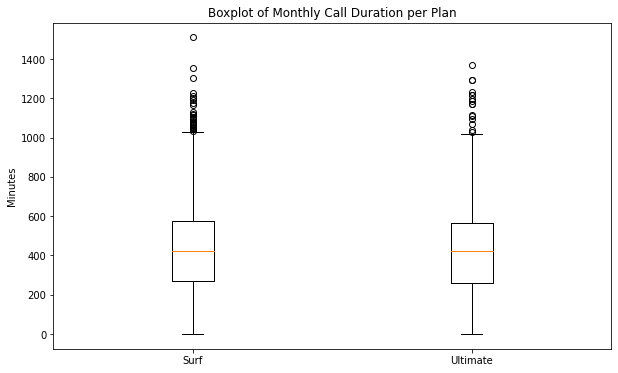

In [34]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(10, 6))
plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])
plt.title('Boxplot of Monthly Call Duration per Plan')
plt.ylabel('Minutes')
plt.show()

conclusion both have similar calling behaviors, higher variance in ultimate plan shows no limit. 
ultimate plan shows eveidence that they make longer duration calls

### Messages

In [35]:
# Compare the number of messages users of each plan tend to send each month
# calculate mean of messages for each plan
surf_messages = aggregate_data[aggregate_data['plan'] == 'surf']['num_messages']
ultimate_messages = aggregate_data[aggregate_data['plan'] == 'ultimate']['num_messages']
# Calculate the mean and variance for the number of messages
surf_messages_mean = surf_messages.mean()
surf_messages_var = surf_messages.var()
ultimate_messages_mean = ultimate_messages.mean()
ultimate_messages_var = ultimate_messages.var()

# Print out the mean and variance for number of messages
print(f"Surf Plan - Messages Mean: {surf_messages_mean:.2f}, Variance: {surf_messages_var:.2f}")
print(f"Ultimate Plan - Messages Mean: {ultimate_messages_mean:.2f}, Variance: {ultimate_messages_var:.2f}")

Surf Plan - Messages Mean: 31.16, Variance: 1126.72
Ultimate Plan - Messages Mean: 37.55, Variance: 1208.76


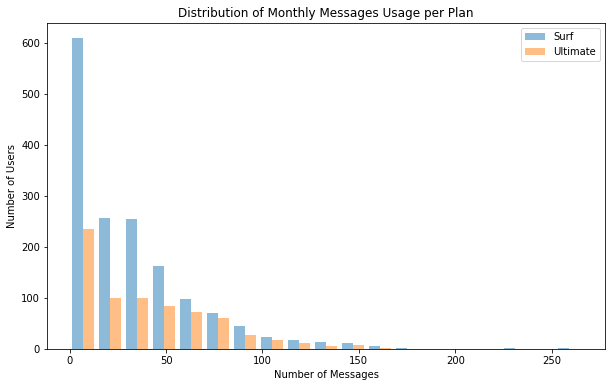

In [36]:
# Compare the amount of internet traffic consumed by users per plan
# calculate mean for internet traffic for each plan
plt.figure(figsize=(10, 6))
# rangefor bins to cover message count
bins = np.linspace(0, max(aggregate_data['num_messages']), 20)
plt.hist([surf_messages, ultimate_messages], bins=bins, alpha=0.5, label=['Surf', 'Ultimate'])
plt.title('Distribution of Monthly Messages Usage per Plan')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

v2 conclusion both plans shows similar messages and dwindles as more messages are used
megaline might consider that the messages are not a big driver in the cost or focus

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Please interpret the graphs in the project

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

It is worth describing intermediate conclusions in the markdown cell.
    
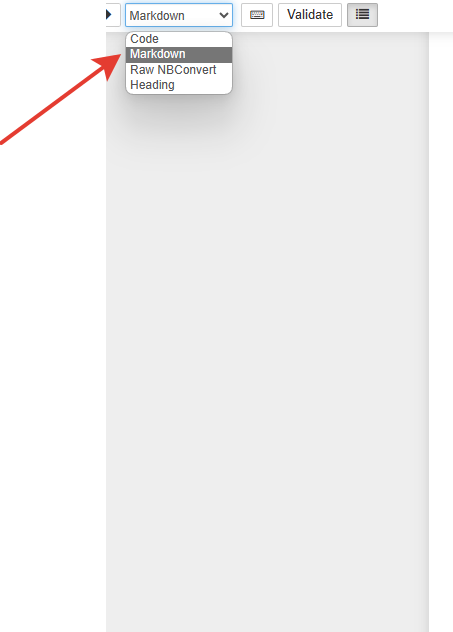    

### Internet

In [37]:
# calculating mean and variance for each plan 
surf_internet = aggregate_data[aggregate_data['plan'] == 'surf']['total_mb_used']
ultimate_internet = aggregate_data[aggregate_data['plan'] == 'ultimate']['total_mb_used']
surf_internet_mean = surf_internet.mean()
surf_internet_var = surf_internet.var()
ultimate_internet_mean = ultimate_internet.mean()
ultimate_internet_var = ultimate_internet.var()
# printing out usage
print(f"Surf Plan - Internet Traffic Mean (MB): {surf_internet_mean:.2f}, Variance: {surf_internet_var:.2f}")
print(f"Ultimate Plan - Internet Traffic Mean (MB): {ultimate_internet_mean:.2f}, Variance: {ultimate_internet_var:.2f}")

Surf Plan - Internet Traffic Mean (MB): 16558.28, Variance: 64216395.84
Ultimate Plan - Internet Traffic Mean (MB): 17214.70, Variance: 61652293.32


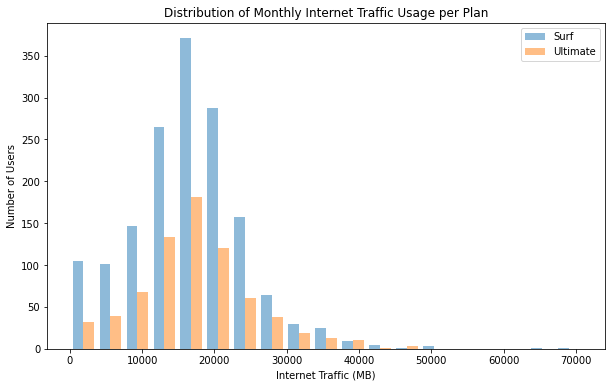

In [38]:
# plotting comparision for internet usuage
plt.figure(figsize=(10, 6))
# The range for bins should cover the range of internet traffic you expect in the dataset
bins = np.linspace(0, max(aggregate_data['total_mb_used']), 20)
plt.hist([surf_internet, ultimate_internet], bins=bins, alpha=0.5, label=['Surf', 'Ultimate'])
plt.title('Distribution of Monthly Internet Traffic Usage per Plan')
plt.xlabel('Internet Traffic (MB)')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

In [39]:
# conclusion based on data
if surf_internet_mean != ultimate_internet_mean or surf_internet_var != ultimate_internet_var:
    conclusion = "Users tend to consume internet traffic differently between the plans."
else:
    conclusion = "There is no significant difference in internet traffic consumption behavior between the plans."
print(conclusion)

Users tend to consume internet traffic differently between the plans.


surf shows users are staying within limits possibly due to overage charges, with this data we can target users who are borderline using data close to the cap
opportunity for upsell to those users base on the comsumption.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [40]:
# calculating stats for monthly revenue by plan
revenue_stats_by_plan = aggregate_data.groupby('plan')['monthly_revenue'].describe() 
print("Revenue Statistics by Plan:")
print(revenue_stats_by_plan)

Revenue Statistics by Plan:
           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


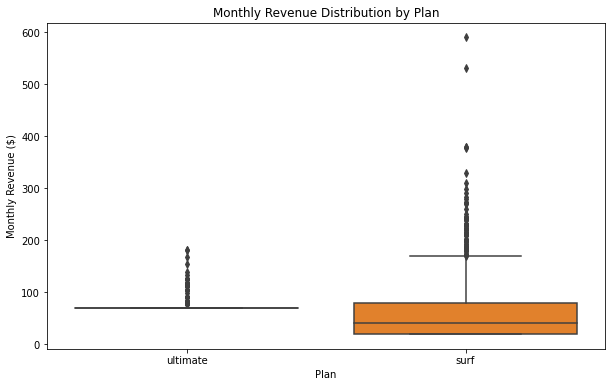

In [41]:
# creating a boxplot to show distribution of revenue
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=aggregate_data)
plt.title('Monthly Revenue Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue ($)')
plt.show()

users on the ultimate plan tend to generate more revenue than those on the surf plan due toe  the base cost. 
users on the surf plan tend to stay within their limits
there are some outliers in the ultimate plan that can be optimize for revenue by addressing users who keep exceeding their plans

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

I'll leave a general comment on the project: let's move all the action moves and conclusions to a regular markdown cell. Only the code itself is worth commenting

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Formulate the null and the alternative hypotheses

null hypothesis no statistical difference 
alternative hypoothesis there are some statistical difference 
significant difference in teh average revenue between plans. 

In [42]:
# Test the hypotheses
# filter the data for each plan
ultimate_revenue = aggregate_data[aggregate_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = aggregate_data[aggregate_data['plan'] == 'surf']['monthly_revenue']
# check normality
print(stats.shapiro(ultimate_revenue))
print(stats.shapiro(surf_revenue))
# check variances
print(stats.levene(ultimate_revenue, surf_revenue))
# using an Independent Samples t-test
alpha = 0.05
t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=True)
print('t-statistic:', t_stat)
print('p-value:', p_value)

ShapiroResult(statistic=0.20936310291290283, pvalue=0.0)
ShapiroResult(statistic=0.7346445918083191, pvalue=1.5414283107572988e-44)
LeveneResult(statistic=404.7301727752691, pvalue=5.028876110654919e-83)
t-statistic: 5.568949166552807
p-value: 2.862674510698644e-08


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


All necessary libraries should be unloaded at the beginning of the project, in one cell

# null hypothesis no statistical difference 
# alternative hypoothesis there are some statistical difference 
#significant difference in teh average revenue between plans. 

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Formulate the null and the alternative hypotheses

In [43]:
# Test the hypotheses
# aggregating data to add city column from megaline_users to aggregated_data. 
aggregate_data = pd.merge(aggregate_data, users[['user_id', 'city']], on='user_id', how='left')
print(aggregate_data.columns)
ny_nj_revenue = aggregate_data[aggregate_data['city'].str.contains('NY-NJ')]['monthly_revenue']
other_revenue = aggregate_data[~aggregate_data['city'].str.contains('NY-NJ')]['monthly_revenue']
ny_nj_revenue = aggregate_data[aggregate_data['city'].str.contains('NY-NJ')]['monthly_revenue']
other_revenue = aggregate_data[~aggregate_data['city'].str.contains('NY-NJ')]['monthly_revenue']
# checking normality and equal variance. then set significance level to. .05 then use independent sample t-test
print(stats.shapiro(ny_nj_revenue))
print(stats.shapiro(other_revenue))
print(stats.levene(ny_nj_revenue, other_revenue))
alpha = 0.05
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=True)
print('t-statistic:', t_stat)
print('p-value:', p_value)
# Interpretinge results
if p_value < alpha:
    print("We reject the null hypothesis: there is a significant difference in average revenue between users in the NY-NJ area and other regions.")
else:
    print("We fail to reject the null hypothesis: there is no significant difference in average revenue between users in the NY-NJ area and other regions.")

Index(['user_id', 'year', 'month', 'number_of_calls', 'total_minutes',
       'num_messages', 'total_mb_used', 'plan', 'monthly_revenue', 'city'],
      dtype='object')
ShapiroResult(statistic=0.8283717632293701, pvalue=9.16044367265658e-20)
ShapiroResult(statistic=0.7427323460578918, pvalue=0.0)
LeveneResult(statistic=2.345281651730069, pvalue=0.12580091109612837)
t-statistic: -2.0194429818968103
p-value: 0.043557431621342436
We reject the null hypothesis: there is a significant difference in average revenue between users in the NY-NJ area and other regions.


conclusion 
null hypothese states there is no difference, alternative hypothesis  there is a difference on how users are using compare to other regions 
using a statistical base on the normality and variance test results. 
we will reject the null hypothesis and and conclude that the statitically significant difference in the average reveue other regions. 

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


It would be nice to add an overall output for the projec
</div>


in this project we conducted a comprehensive analysis fo the revenue generated by two telecom plan. Surf and ultimate to determine which on is more profitable
behavior calls have higher usage for ultimate, messages seem to be similar, internet traffic with higher usage for ultimate since they have less constraint, revenue has ultimate to be more profitable
statistical testing
revenue compare to other region to nj/ny have different usage based on the t-test results which could be a important to megaline
alpha level was set to .05, balancing the risk of type 1 and 2 testing
conclusion ultimate plan is more profitable for megaline with users having a broader range of revenue difference. surf have a more stable base. 
with this information we can find consumption patterns to match the users better. 

<div class="alert alert-block alert-danger">✍
    
__Reviewer's comment №2__

I'll leave a general comment on the project: let's move all the action moves and conclusions to a regular markdown cell, shall we? Only the code itself is worth commenting

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊